[View in Colaboratory](https://colab.research.google.com/github/vikasmech/apollo/blob/demo_dev/PreLoad.ipynb)

In [0]:
!pip install keras

In [0]:
import keras
import numpy as np
from keras.applications import resnet50
from PIL import Image
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 

--2018-04-14 02:21:22--  http://juliandance.org/wp-content/uploads/2016/01/RedApple.jpg
Resolving juliandance.org (juliandance.org)... 208.67.16.217
Connecting to juliandance.org (juliandance.org)|208.67.16.217|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46677 (46K) [image/jpeg]
Saving to: ‘RedApple.jpg.9’

RedApple.jpg.9      100%[===================>]  45.58K  --.-KB/s    in 0.05s   

2018-04-14 02:21:22 (912 KB/s) - ‘RedApple.jpg.9’ saved [46677/46677]

image batch size (1, 224, 224, 3)


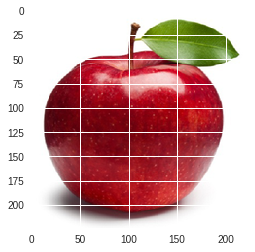

In [0]:
!wget 'http://juliandance.org/wp-content/uploads/2016/01/RedApple.jpg'
im = Image.open("RedApple.jpg")
img = im.resize((224, 224), Image.ANTIALIAS)
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
numpy_image = img_to_array(img)
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [0]:
# prepare the image for the ResNet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)

# convert the probabilities to class labels
# If you want to see the top 3 predictions, specify it using the top argument
label_resnet = decode_predictions(predictions, top=3)
label_resnet

[[('n07742313', 'Granny_Smith', 0.842357),
  ('n07768694', 'pomegranate', 0.07000632),
  ('n07747607', 'orange', 0.031384002)]]